<a target="_blank" href="https://colab.research.google.com/github/RanjeetKumbhar01/TE_IT_DSBDA_ASSIGNMENTS_SPPU/blob/main/Group_B/B_2/b_2_Heart.ipynb">
  <img align="left" alt="Goolge Colab"  src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [71]:
# import pandas library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# Reading csv file
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Cleaning

In [73]:
df = df.drop_duplicates()

In [74]:
# Count ,min,max ,etc of each column
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [75]:
# Information about each column data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [76]:
#Finding null values in each column
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Data Integration

In [77]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
subSet1 = df[['age','cp','chol','thalachh']]

In [79]:
subSet2 = df[['exng','slp','output']]

In [80]:

merge_data = pd.concat([subSet1,subSet2])
merge_data

,age,cp,chol,thalachh,exng,slp,output
0,63.0,3.0,233.0,150.0,NaN,NaN,NaN
1,37.0,2.0,250.0,187.0,NaN,NaN,NaN
2,41.0,1.0,204.0,172.0,NaN,NaN,NaN
3,56.0,1.0,236.0,178.0,NaN,NaN,NaN
4,57.0,0.0,354.0,163.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
298,NaN,NaN,NaN,NaN,1.0,1.0,0.0
299,NaN,NaN,NaN,NaN,0.0,1.0,0.0
300,NaN,NaN,NaN,NaN,0.0,1.0,0.0
301,NaN,NaN,NaN,NaN,1.0,1.0,0.0


## Error Correcting

In [81]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [82]:
# IQR (Interquartile Range)
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1                 #dispersion of the middle 50% of the data
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [83]:
# Remove outliers for each column using a loop
col_name = ['cp','thalachh','exng','oldpeak','slp','caa']
for col in col_name:
    df[col] = remove_outliers(df[col])

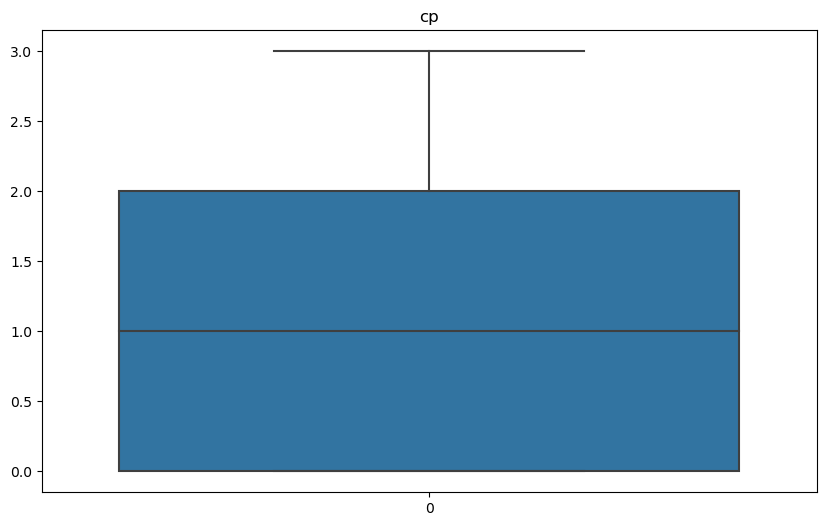

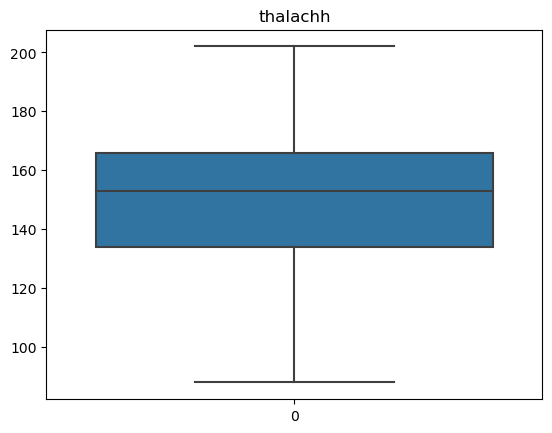

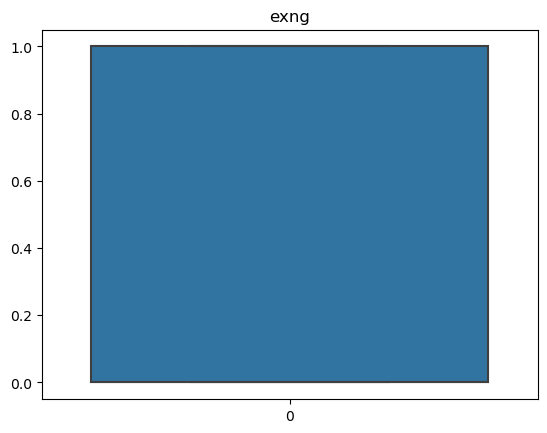

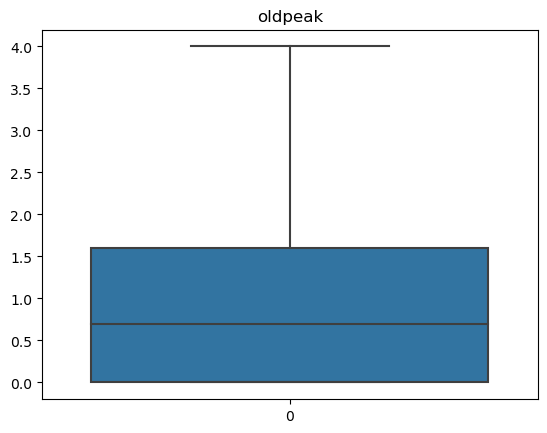

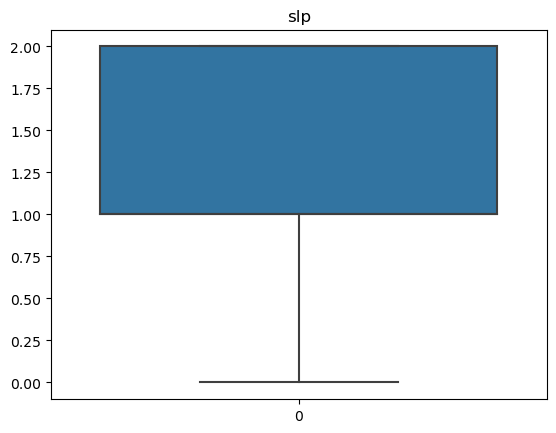

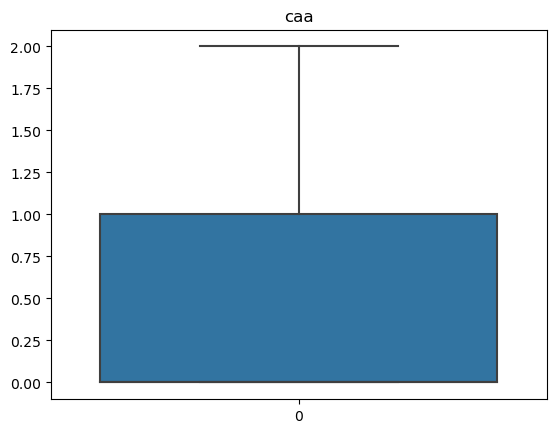

In [84]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

In [85]:
df = df.dropna()  # it operates on rows, meaning it removes entire rows where any of the values are missing.

In [86]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Data Split

In [87]:
# splitting data using train test split
x = df[['cp','thalachh','exng','oldpeak','slp','caa']]
y = df.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((220, 6), (55, 6), (220,), (55,))

## Data transformation

In [88]:
from sklearn.preprocessing import StandardScaler# removing the mean and scaling to unit variance

In [89]:
scaler = StandardScaler()

In [90]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [95]:
print("Scaled Training Data:")
print(x_train_scaled)

print("\nScaled Testing Data:")
print(x_test_scaled)


Scaled Training Data:
[[ 0.91647351  0.97950613 -0.66885605 -0.75201448  0.96769965  0.7103991 ]
 [-0.96786455 -0.97184587  1.49509     1.62134861 -0.69553412  2.1058259 ]
 [ 0.91647351  0.40297032 -0.66885605 -0.94979473  0.96769965  0.7103991 ]
 ...
 [ 0.91647351  0.93515723  1.49509    -0.94979473  0.96769965 -0.6850277 ]
 [ 0.91647351  0.22557468 -0.66885605 -0.94979473  0.96769965 -0.6850277 ]
 [-0.96786455  0.8021105  -0.66885605 -0.94979473  0.96769965 -0.6850277 ]]

Scaled Testing Data:
[[ 0.91647351  0.71341268 -0.66885605 -0.94979473  0.96769965 -0.6850277 ]
 [-0.96786455 -0.39531005  1.49509     1.81912886 -0.69553412  2.1058259 ]
 [ 0.91647351  0.04817904 -0.66885605 -0.94979473  0.96769965 -0.6850277 ]
 [-0.02569552  0.53601704 -0.66885605 -0.94979473  0.96769965 -0.6850277 ]
 [-0.96786455 -1.14924151  1.49509     1.62134861 -2.3587679  -0.6850277 ]
 [ 0.91647351 -1.72577732  1.49509     1.91801899 -0.69553412  0.7103991 ]
 [-0.96786455  0.3142725  -0.66885605 -0.94979473 

## Data model building

In [103]:
y_train= np.ravel(y_train).reshape(-1, 1)# Multi-arr to 1d-arr
y_test= np.ravel(y_test).reshape(-1, 1)

In [104]:
y_train.shape

(220, 1)

In [105]:

model = LogisticRegression()
model.fit(x_train_scaled, np.ravel(y_train))

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8363636363636363


In [106]:
#Classification model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier(criterion='entropy')
tc.fit(x_train_scaled,y_train)
y_pred=tc.predict(x_test_scaled)

print("Training Accuracy Score :",accuracy_score(y_pred,y_test))
print("Training Confusion Matrix  :",confusion_matrix(y_pred,y_test))

Training Accuracy Score : 0.8
Training Confusion Matrix  : [[21  5]
 [ 6 23]]
